## ECS171 Project <br>
_By Group 2: Maitri, Travis, Johal, Noah, Sage, Krupa, Sweta_<br>
_Coding Team: Sage, Krupa, Sweta_
<br>

Hello, and welcome to our data and model exploration and model implementation! This is where we studied our data and found the results of our experiments. Here, we experimentally investigated which form of regression would provide the most accurate model to predict the CO2 emissions of cars.<br>
This notebook can be interpreted in several parts:
- Step 1: Exploratory Data Analysis
- Step 2: Dataset Clean Up and Preprocessing
- Step 3: Experimental Data Comparison
- Step 4: Experimental Model Analysis
- Step 5: Implementation of Model
<br>
<br>

### Step 1: Data Analysis
Our first step, data analysis, consists of getting a complete view of our dataset by printing it out, and then going into each feature individually and assessing them for type and distribution.

First, we get a brief overview of the datasets contents and determine how many samples we have (7385) and how many attributes we have (12 columns: 11 features and 1 target class).

In [1]:
#looking to see what the dataset contains.

import pandas as pd

with open("CO2_Emissions_Canada.csv") as csvfile:
    df_car_info = pd.read_csv(csvfile)
csvfile.close()

In [2]:
print(df_car_info)
df = df_car_info.copy()

       Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6

We can see our dataset contains 7385 samples of different cars and their emissions. Our target class is "CO2 Emissions(g/km)." We appear to have 4 attributes with continuous data (Fuel Consumption in Cities, Highways, Combined (L/km) and Combined (mpg)), and 7 attributes with categorical data (Make, Model, Vehicle Class, Engine, Size(L), Cylinders).<br>
For each of our 11 features, we can check the distribution of their data and make sure no attribute is overly weighted towards one particular trait.
For our categorical data in particular, we must also check the number of unique values inside of each and determine what form of encoding is most appropriate: label encoding or one-hot-encoding.
<br>
<br>

#### First, we check the "Make" column, an attribute describing the Makers (company) of the vehicle.

['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']
42 categories of Make in dataset


[Text(0, 0, 'ACURA'),
 Text(1, 0, 'ALFA ROMEO'),
 Text(2, 0, 'ASTON MARTIN'),
 Text(3, 0, 'AUDI'),
 Text(4, 0, 'BENTLEY'),
 Text(5, 0, 'BMW'),
 Text(6, 0, 'BUICK'),
 Text(7, 0, 'CADILLAC'),
 Text(8, 0, 'CHEVROLET'),
 Text(9, 0, 'CHRYSLER'),
 Text(10, 0, 'DODGE'),
 Text(11, 0, 'FIAT'),
 Text(12, 0, 'FORD'),
 Text(13, 0, 'GMC'),
 Text(14, 0, 'HONDA'),
 Text(15, 0, 'HYUNDAI'),
 Text(16, 0, 'INFINITI'),
 Text(17, 0, 'JAGUAR'),
 Text(18, 0, 'JEEP'),
 Text(19, 0, 'KIA'),
 Text(20, 0, 'LAMBORGHINI'),
 Text(21, 0, 'LAND ROVER'),
 Text(22, 0, 'LEXUS'),
 Text(23, 0, 'LINCOLN'),
 Text(24, 0, 'MASERATI'),
 Text(25, 0, 'MAZDA'),
 Text(26, 0, 'MERCEDES-BENZ'),
 Text(27, 0, 'MINI'),
 Text(28, 0, 'MITSUBISHI'),
 Text(29, 0, 'NISSAN'),
 Text(30, 0, 'PORSCHE'),
 Text(31, 0, 'RAM'),
 Text(32, 0, 'ROLLS-ROYCE'),
 Text(33, 0, 'SCION'),
 Text(34, 0, 'SMART'),
 Text(35, 0, 'SRT'),
 Text(36, 0, 'SUBARU'),
 Text(37, 0, 'TOYOTA'),
 Text(38, 0, 'VOLKSWAGEN'),
 Text(39, 0, 'VOLVO'),
 Text(40, 0, 'GENESIS'),
 Text

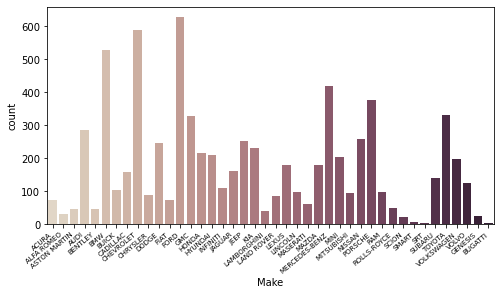

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
make_values = df.Make.unique()
print(make_values)
print(str(make_values.size) + " categories of Make in dataset")
plt.figure(figsize=(8,4))
ax = sns.countplot(x="Make", palette="ch:.25", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)

It appears we have 42 categories of Make in our dataset. Due to the large number of unique values, it would be unwise to select this category for one-hot-encoding. The distribution does not seem overly heavy on just one Make of car, although some Makes of car appear to be rarer or undersampled that others. It is not to the point of needing to oversample.

#### Check the "Model" column, an attribute describing the Type of Car the Company made.

['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']
2049 categories of Model in dataset


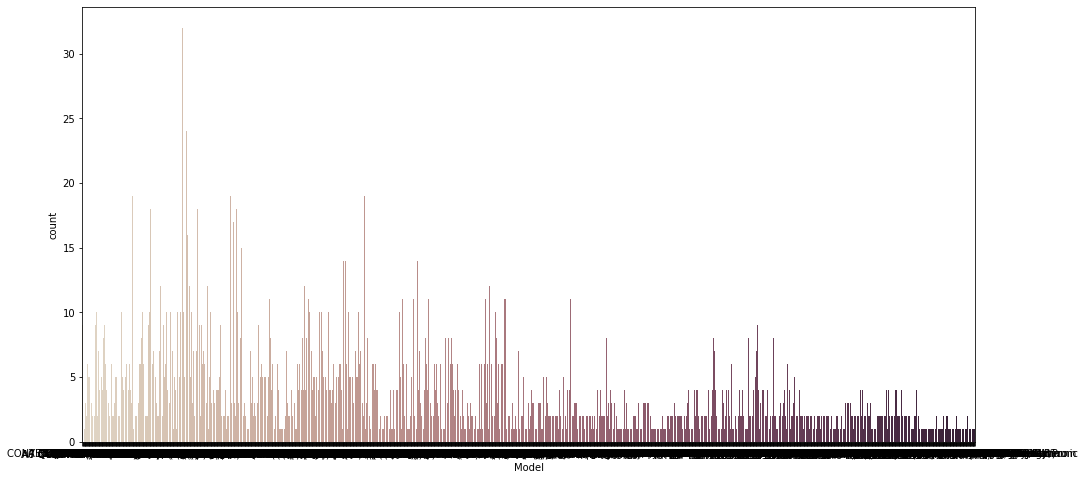

In [4]:
#All different values in Model column

model_values = df.Model.unique()
print(model_values)
print(str(model_values.size) + " categories of Model in dataset")

plt.figure(figsize=(16,8))
ax = sns.countplot(x="Model", palette="ch:.25", data=df)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)
#tick labels could not be implemented, due to their obscuring of the graph itself

It appears we have 2049 categories of Model in our dataset. Due to the large number of unique values, it would be unwise to select this category for one-hot-encoding. Additionally, while the model is difficult to read due to the sheer number of categories, it is still managing to show the distribution of the Models on a macro level. The distribution does not seem overly heavy on just one Model of car. It is not to the point of needing to oversample.


#### Check the "Vehicle Class" column, an attribute describing the "Bulk" and typing of the vehicle.
Note: "Bulk" in this instance refers to the vehicles "purpose" when it was made. The vehicle "purpose" simply has an impact on the size and fuel consumption of a car, as well as the amount of weight it can carry. For example, a 2-seater will typically carry a load of around 2 people, and an SUV can carry significantly more weight. The amount of weight the vehicle can carry can be reflected in the amount of fuel it burns, and thus it's CO2 emissions as well.

['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']
16 categories of Vehicle Class in dataset


[Text(0, 0, 'COMPACT'),
 Text(1, 0, 'SUV - SMALL'),
 Text(2, 0, 'MID-SIZE'),
 Text(3, 0, 'TWO-SEATER'),
 Text(4, 0, 'MINICOMPACT'),
 Text(5, 0, 'SUBCOMPACT'),
 Text(6, 0, 'FULL-SIZE'),
 Text(7, 0, 'STATION WAGON - SMALL'),
 Text(8, 0, 'SUV - STANDARD'),
 Text(9, 0, 'VAN - CARGO'),
 Text(10, 0, 'VAN - PASSENGER'),
 Text(11, 0, 'PICKUP TRUCK - STANDARD'),
 Text(12, 0, 'MINIVAN'),
 Text(13, 0, 'SPECIAL PURPOSE VEHICLE'),
 Text(14, 0, 'STATION WAGON - MID-SIZE'),
 Text(15, 0, 'PICKUP TRUCK - SMALL')]

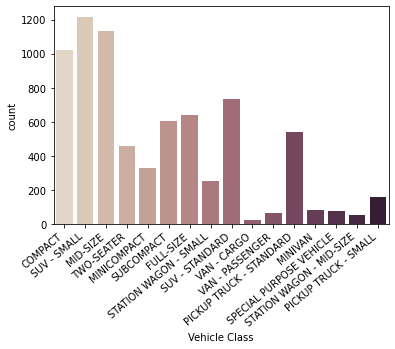

In [5]:
#All different values in Vehicle Class column

class_values = df["Vehicle Class"].unique()
print(class_values)
print(str(class_values.size) + " categories of Vehicle Class in dataset")
ax = sns.countplot(x="Vehicle Class", palette="ch:.25", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

It appears we have 16 categories of Vehicle Class in our dataset. This feature might be a candidate for one-hot-encoding. The distribution does not seem overly heavy on just one class of car, although some class of car appear to be rarer or more undersampled that others. It is not to the point of needing to oversample.


#### Check the "Engine Size" column, an attribute describing the size of the engine.
Note: We consider "Engine Size" to be a categorical value due to the fact that 'size of engine' is a discrete, conventional value, and not is not a value that can be strictly calculated with a measuring device, unlike our fuel consumption categories.

[2.  2.4 1.5 3.5 3.7 1.8 5.9 4.7 3.  4.  6.3 4.2 5.2 6.  6.8 4.4 3.6 1.4
 2.5 6.2 4.3 5.3 4.8 1.2 5.7 6.4 4.6 5.4 1.6 5.  1.  5.8 3.8 3.3 5.6 3.2
 6.5 5.5 2.1 3.4 2.7 6.6 6.7 1.3 8.4 2.3 2.8 0.9 2.9 8.  2.2]
51 sizes of engine in dataset


[Text(0, 0, '0.9'),
 Text(1, 0, '1.0'),
 Text(2, 0, '1.2'),
 Text(3, 0, '1.3'),
 Text(4, 0, '1.4'),
 Text(5, 0, '1.5'),
 Text(6, 0, '1.6'),
 Text(7, 0, '1.8'),
 Text(8, 0, '2.0'),
 Text(9, 0, '2.1'),
 Text(10, 0, '2.2'),
 Text(11, 0, '2.3'),
 Text(12, 0, '2.4'),
 Text(13, 0, '2.5'),
 Text(14, 0, '2.7'),
 Text(15, 0, '2.8'),
 Text(16, 0, '2.9'),
 Text(17, 0, '3.0'),
 Text(18, 0, '3.2'),
 Text(19, 0, '3.3'),
 Text(20, 0, '3.4'),
 Text(21, 0, '3.5'),
 Text(22, 0, '3.6'),
 Text(23, 0, '3.7'),
 Text(24, 0, '3.8'),
 Text(25, 0, '4.0'),
 Text(26, 0, '4.2'),
 Text(27, 0, '4.3'),
 Text(28, 0, '4.4'),
 Text(29, 0, '4.6'),
 Text(30, 0, '4.7'),
 Text(31, 0, '4.8'),
 Text(32, 0, '5.0'),
 Text(33, 0, '5.2'),
 Text(34, 0, '5.3'),
 Text(35, 0, '5.4'),
 Text(36, 0, '5.5'),
 Text(37, 0, '5.6'),
 Text(38, 0, '5.7'),
 Text(39, 0, '5.8'),
 Text(40, 0, '5.9'),
 Text(41, 0, '6.0'),
 Text(42, 0, '6.2'),
 Text(43, 0, '6.3'),
 Text(44, 0, '6.4'),
 Text(45, 0, '6.5'),
 Text(46, 0, '6.6'),
 Text(47, 0, '6.7'),
 T

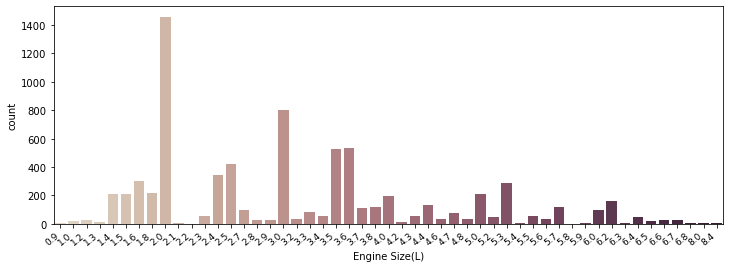

In [6]:
#All different values in Engine Size column

engine_values = df["Engine Size(L)"].unique()
print(engine_values)
print(str(engine_values.size) + " sizes of engine in dataset")
plt.figure(figsize=(12,4))
ax = sns.countplot(x="Engine Size(L)", palette="ch:.25", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=9)

It appears we have 51 categories of Engline Size in our dataset. Due to the large number of unique values, it would be unwise to select this category for one-hot-encoding. Additionally, while the model is difficult to read due to the sheer number of categories, it is still managing to show the distribution of the Models on a macro level. The distribution does not seem overly heavy on just one Make of car, although some Makes of car appear to be rarer or undersampled that others. It is not to the point of needing to oversample.


#### Check the "Cylinders" column, an attribute describing the number of cyliders in the engine of the car.
Note: Cylinders must be categorical to avoid the possibility that the model will try and predict an odd number of cylidners in a continuous-style presentation of the data. All cylinders must be even.

[ 4  6 12  8 10  3  5 16]
8 classes of Cylinders in dataset


[Text(0, 0, '3'),
 Text(1, 0, '4'),
 Text(2, 0, '5'),
 Text(3, 0, '6'),
 Text(4, 0, '8'),
 Text(5, 0, '10'),
 Text(6, 0, '12'),
 Text(7, 0, '16')]

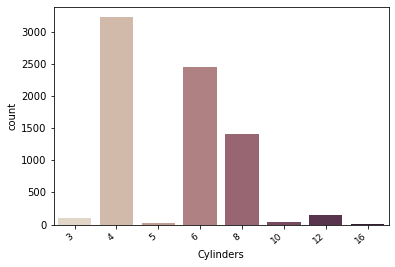

In [7]:
#All different values in Cylinders column

cylinder_values = df.Cylinders.unique()
print(cylinder_values)
print(str(cylinder_values.size) + " classes of Cylinders in dataset")
ax = sns.countplot(x="Cylinders", palette="ch:.25", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=9)

It appears we have 8 categories of Cylinder number in our dataset. This feature might be a candidate for one-hot-encoding. The distribution does not seem overly heavy on just one type of cylinder per car, although some cylinders appear to be rarer or undersampled that others. It is not to the point of needing to oversample.

#### Check the "Transmission" column, an attribute describing the combination of type of transmission with the number of gears.

['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'AV8' 'AS8' 'A7' 'A8' 'M7' 'A4'
 'M5' 'AV' 'A5' 'AS7' 'A9' 'AS9' 'AV6' 'AS4' 'AM5' 'AM8' 'AM9' 'AS10'
 'A10' 'AV10']
27 combinations of transmissions and gear number in dataset


[Text(0, 0, 'AS5'),
 Text(1, 0, 'M6'),
 Text(2, 0, 'AV7'),
 Text(3, 0, 'AS6'),
 Text(4, 0, 'AM6'),
 Text(5, 0, 'A6'),
 Text(6, 0, 'AM7'),
 Text(7, 0, 'AV8'),
 Text(8, 0, 'AS8'),
 Text(9, 0, 'A7'),
 Text(10, 0, 'A8'),
 Text(11, 0, 'M7'),
 Text(12, 0, 'A4'),
 Text(13, 0, 'M5'),
 Text(14, 0, 'AV'),
 Text(15, 0, 'A5'),
 Text(16, 0, 'AS7'),
 Text(17, 0, 'A9'),
 Text(18, 0, 'AS9'),
 Text(19, 0, 'AV6'),
 Text(20, 0, 'AS4'),
 Text(21, 0, 'AM5'),
 Text(22, 0, 'AM8'),
 Text(23, 0, 'AM9'),
 Text(24, 0, 'AS10'),
 Text(25, 0, 'A10'),
 Text(26, 0, 'AV10')]

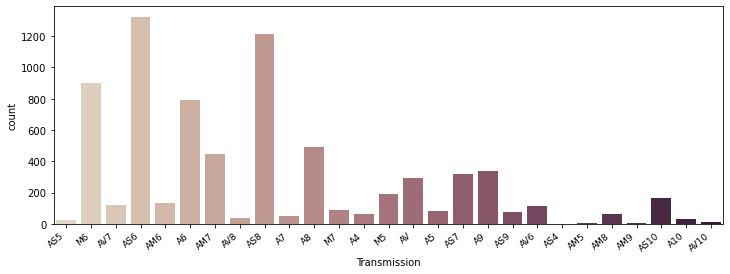

In [8]:
#All different values in Transmission column

transmission_values = df["Transmission"].unique()
print(transmission_values)
print(str(transmission_values.size) + " combinations of transmissions and gear number in dataset")
plt.figure(figsize=(12,4))
ax = sns.countplot(x="Transmission", palette="ch:.25", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=9)

It appears we have 27 combinations of transmission type and gear number. Due to the large number of unique values, it would be unwise to select this category for one-hot-encoding. The distribution does not seem overly heavy on just one transmission-gear type, so it is not to the point of needing to oversample.

#### Check the "Fuel Type" column, an attribute describing the combination of type of fuel the car uses.

['Z' 'D' 'X' 'E' 'N']
5 types of Fuel in dataset


[Text(0, 0, 'Z'),
 Text(1, 0, 'D'),
 Text(2, 0, 'X'),
 Text(3, 0, 'E'),
 Text(4, 0, 'N')]

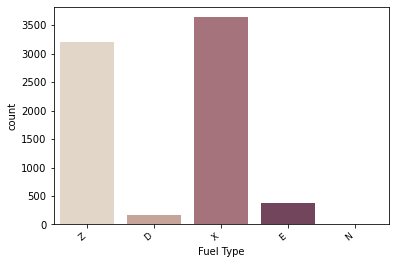

In [9]:
#All different values in Fuel Type column

fuel_values = df["Fuel Type"].unique()
print(fuel_values)
print(str(fuel_values.size) + " types of Fuel in dataset")
ax = sns.countplot(x="Fuel Type", palette="ch:.25", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=9)

It appears we have 5 categories of fuel type. This feature might be a candidate for one-hot-encoding. The distribution does not seem overly heavy on just one transmission-gear type, so it is not to the point of needing to oversample.

#### Find the range and average of the "Fuel Consumption City" column, an attribute describing the amount of fuel cars consume while driving through cities.

Fuel Consumption in cities range:  4.2  to  30.6
Average:  12.556533513879508


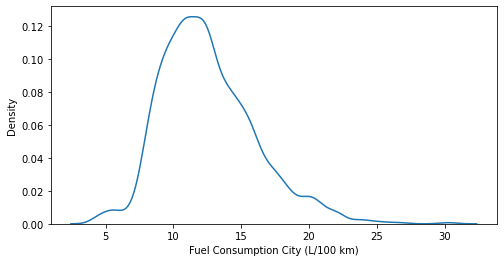

In [10]:
print("Fuel Consumption in cities range: ", min(df["Fuel Consumption City (L/100 km)"]), " to ", max(df["Fuel Consumption City (L/100 km)"]))
print("Average: ", sum(df["Fuel Consumption City (L/100 km)"])/df["Fuel Consumption City (L/100 km)"].size)

plt.figure(figsize=(8,4))
ax = sns.kdeplot(x="Fuel Consumption City (L/100 km)", palette="ch:.25", data=df)





#### Find the range and average of the "Fuel Consumption Hwy" column, an attribute describing the amount of fuel cars consume while driving on Highways.

Fuel Consumption on highways range:  4.0  to  20.6
Average:  9.04170616113748


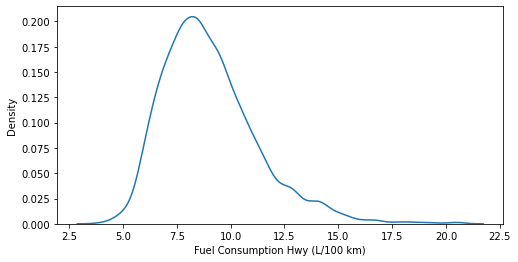

In [11]:
print("Fuel Consumption on highways range: ", min(df["Fuel Consumption Hwy (L/100 km)"]), " to ", max(df["Fuel Consumption Hwy (L/100 km)"]))
print("Average: ", sum(df["Fuel Consumption Hwy (L/100 km)"])/df["Fuel Consumption Hwy (L/100 km)"].size)

plt.figure(figsize=(8,4))
ax = sns.kdeplot(x="Fuel Consumption Hwy (L/100 km)", palette="ch:.25", data=df)




#### Find the range and average of the "Fuel Consumption Comb (L/100 km)" column, an attribute describing the amount of fuel cars consume while driving through cities and highways combined.

Fuel Consumption Combined (L/100 km) range:  4.1  to  26.1
Average:  10.97507109004736


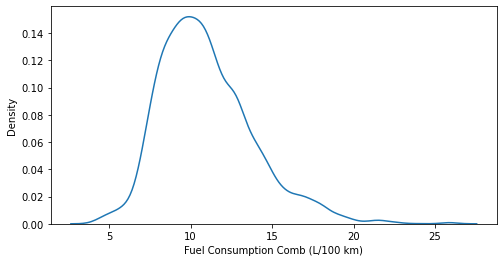

In [12]:
print("Fuel Consumption Combined (L/100 km) range: ", min(df["Fuel Consumption Comb (L/100 km)"]), " to ", max(df["Fuel Consumption Comb (L/100 km)"]))
print("Average: ", sum(df["Fuel Consumption Comb (L/100 km)"])/df["Fuel Consumption Comb (L/100 km)"].size)

plt.figure(figsize=(8,4))
ax = sns.kdeplot(x="Fuel Consumption Comb (L/100 km)", palette="ch:.25", data=df)


#### Find the range and average of the "Fuel Consumption Comb (mpg)" column, an attribute describing the amount of fuel cars consume while driving through cities in miles per gallon.

Fuel Consumption Combined (mpg) range:  11  to  69
Average:  27.48165199729181


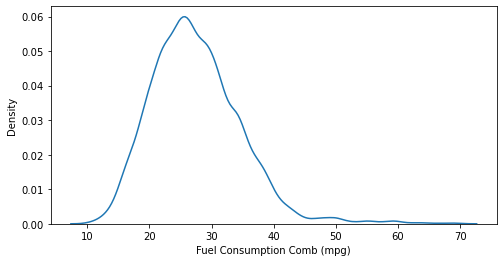

In [13]:
print("Fuel Consumption Combined (mpg) range: ", min(df["Fuel Consumption Comb (mpg)"]), " to ", max(df["Fuel Consumption Comb (mpg)"]))
print("Average: ", sum(df["Fuel Consumption Comb (mpg)"])/df["Fuel Consumption Comb (mpg)"].size)
plt.figure(figsize=(8,4))
ax = sns.kdeplot(x="Fuel Consumption Comb (mpg)", palette="ch:.25", data=df)


#### Find the range and average of the "CO2 Emissions" target value

CO2 Emission range:  96  to  522
Average:  250.58469871360867


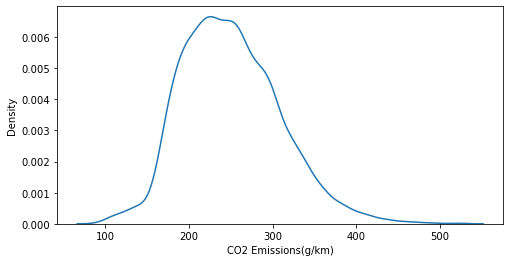

In [14]:
print("CO2 Emission range: ", min(df["CO2 Emissions(g/km)"]), " to ", max(df["CO2 Emissions(g/km)"]))
print("Average: ", sum(df["CO2 Emissions(g/km)"])/df["CO2 Emissions(g/km)"].size)

plt.figure(figsize=(8,4))
ax = sns.kdeplot(x="CO2 Emissions(g/km)", palette="ch:.25", data=df)



### Part 2: Preparing the Data for a Regression Model
For preparing the data, we must encode the categorical values with label encoding. Since there exist some categories with too many unique data values, we should apply label coding across all categorical values for consistency.

In [15]:
#encoding categorical data to use in regression model

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#encode all columns
make_ = le.fit_transform(df.Make)
model_ = le.fit_transform(df.Model)
class_ = le.fit_transform(df["Vehicle Class"])
size_ = le.fit_transform(df["Engine Size(L)"])
cylinder_ = le.fit_transform(df.Cylinders)
trans_ = le.fit_transform(df.Transmission)
fuel_ = le.fit_transform(df["Fuel Type"])

#check if encoding worked
print(make_, model_, class_, size_, cylinder_, trans_, fuel_)

[ 0  0  0 ... 41 41 41] [1056 1056 1057 ... 1956 1964 1965] [ 0  0  0 ... 11 12 12] [ 8 12  5 ...  8  8  8] [1 1 1 ... 1 1 1] [14 25 22 ... 17 17 17] [4 4 4 ... 4 4 4]




### Part 3: Experimental Data Comparison
For part 3, we will first attempt to determine the type of regression model (linear or polynomial) we need to predict CO2 values by looking at the correlations between data categories alone. 
We make a correlation matrix to see which categories most strongly correlate to data emissions.

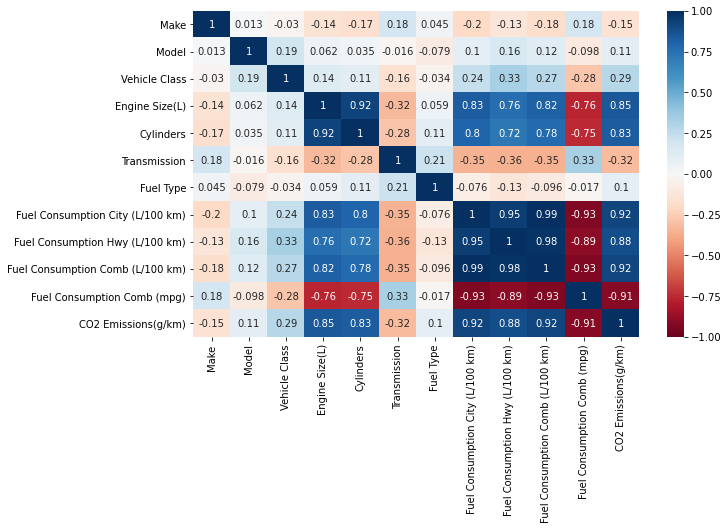

In [16]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#import csv
  
df_car_ = df_car_info

#re-insert encoded data into the dataset
df_car_["Make"] = make_
df_car_["Model"] = model_
df_car_["Vehicle Class"] = class_
df_car_["Engine Size(L)"] = size_
df_car_["Cylinders"] = cylinder_
df_car_["Transmission"] = trans_
df_car_["Fuel Type"] = fuel_

corr = df_car_.corr()
    
plt.figure(figsize=(10, 6))
_ = sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')
    
    #Source: code based off of ECS171 discussion examples

As we can see, the numerical data appears to correlate most strongly with CO2 emissions in the dataset. We can not check if the correlation is occuring in a linear or polynomial fashion. By implementing a pair plot

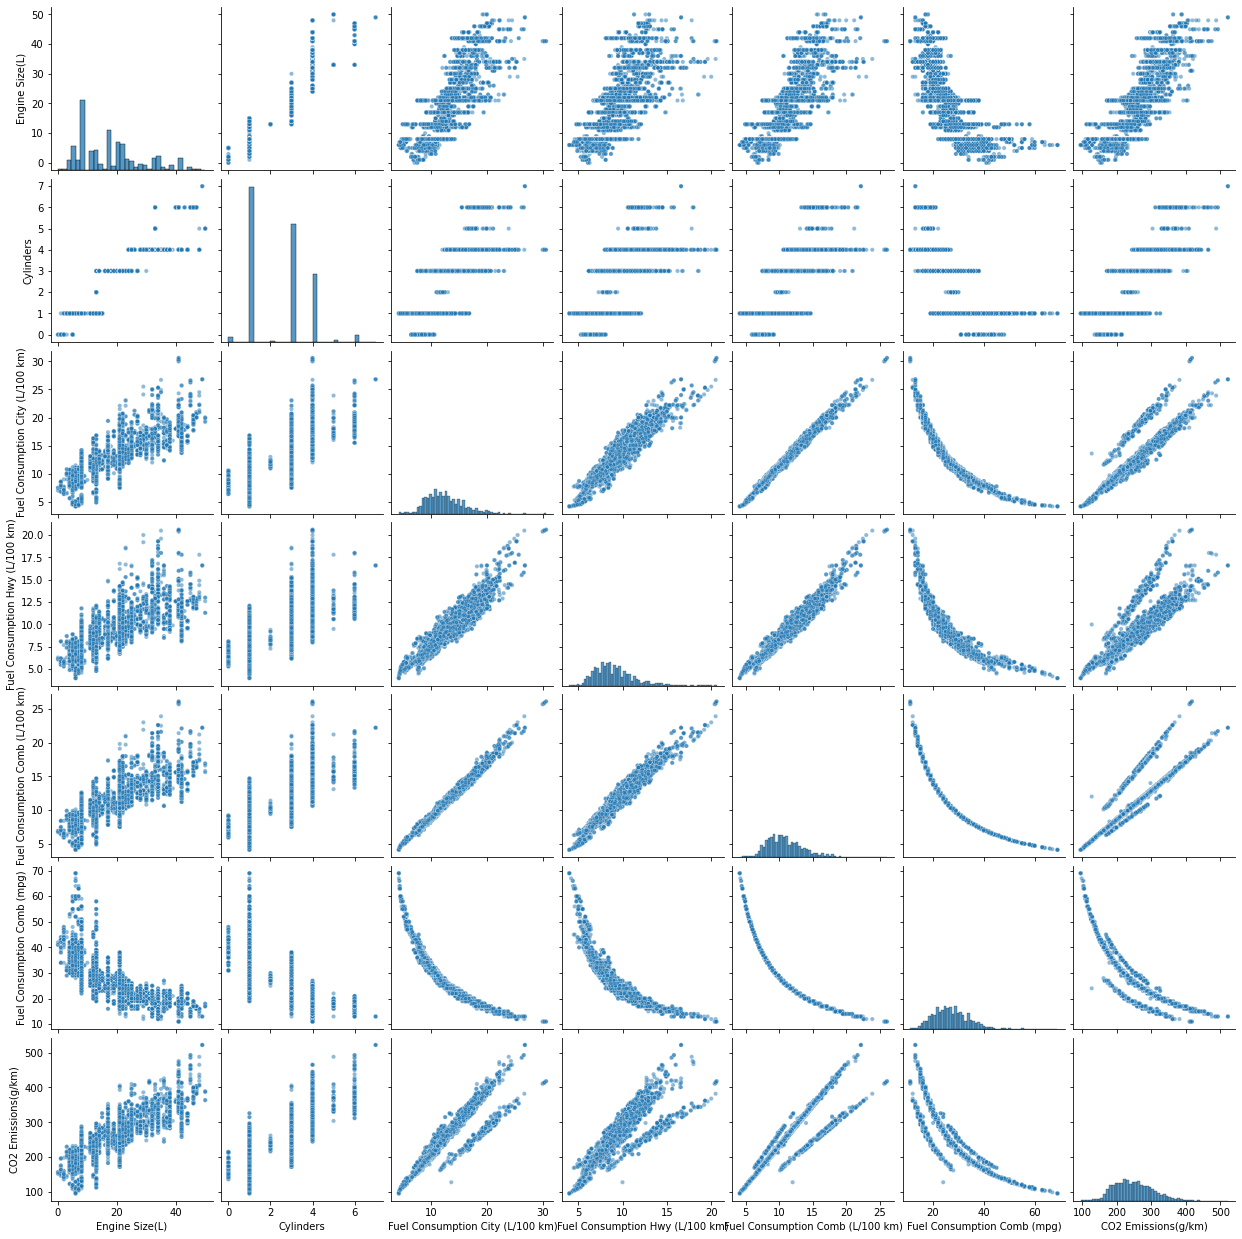

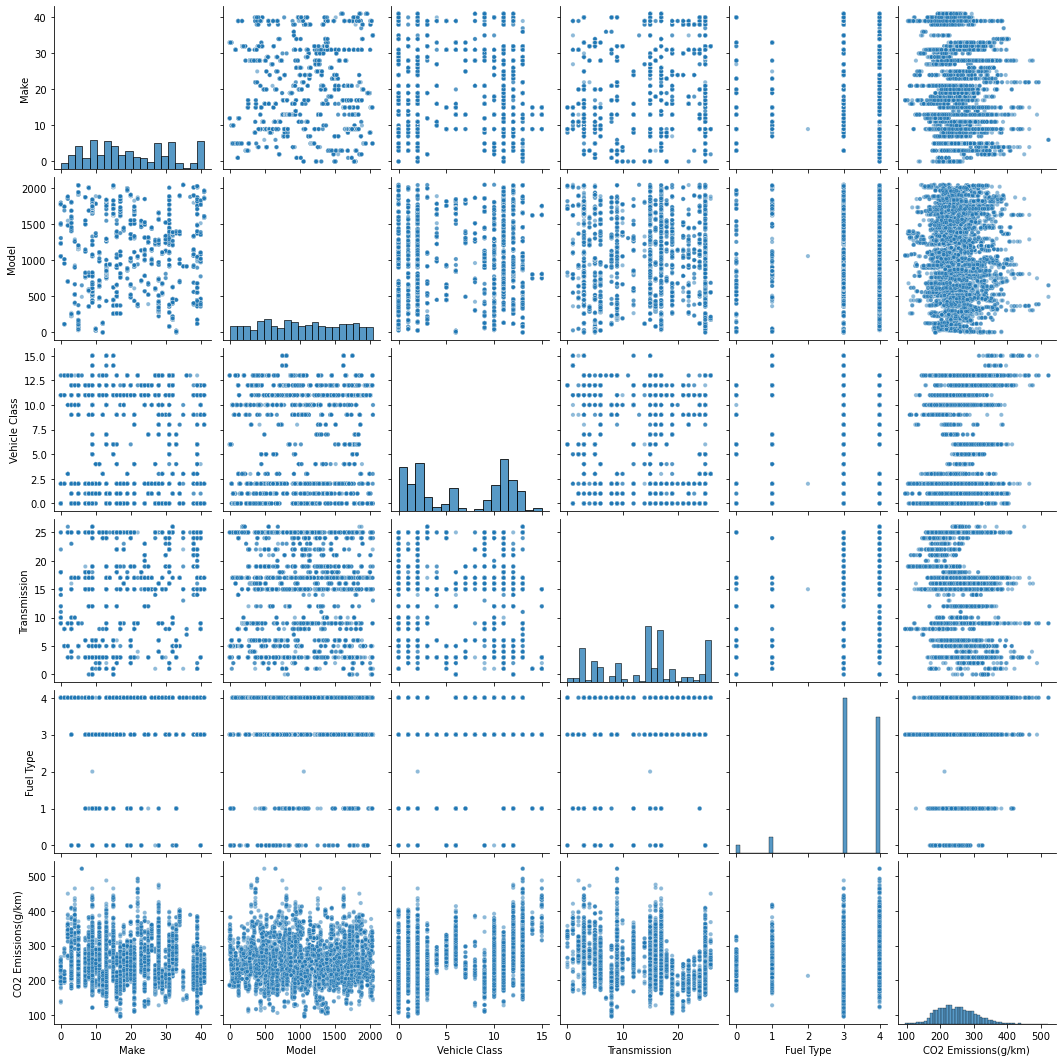

In [17]:

sns.pairplot(data=df_car_, #hue='CO2 Emissions(g/km)',
    # Variables within data to use
    vars=['Engine Size(L)','Cylinders', 'Fuel Consumption City (L/100 km)',
            'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
    # Use kde for the diagonal subplots
    diag_kind='hist',
    plot_kws=dict(
        size=.5,
        alpha=.5,
    ))

sns.pairplot(data=df_car_, #hue='CO2 Emissions(g/km)',
    # Variables within data to use
    vars=['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type', 'CO2 Emissions(g/km)'],
    # Use kde for the diagonal subplots
    diag_kind='hist',
    plot_kws=dict(
        size=.5,
        alpha=.5,
    ))

Based on the shape of these datapoints in the pair plot, we appear to have a combination of linear and polynomial curves in our CO2 dataset. The results from the dataset attribute comparison are unclear. Therefore, we must resort to experimentally determining the required model that provides the least amount of error.

### Part 4: Experimental Model Analysis
In this part, we compare linear and polynomial regression of varying degrees. We attempt to determine which, if any, of the attributes in the dataset are best suited for the model by dividing them up into groups. For each model type, we use:
- all attributes
- continuous attributes only
- categorical attributes only
- attributes with a correlation score of over 0.9

We hypothesize that based on the correlation matrix, the models with categorical attributes will have the most error, and the models using features with a correlation score of over 0.9 will be the most accurate.

We split the data into training and testing models and go from there. Here are the results with the Mean Squared Testing results:

In [18]:
#split the data
from sklearn.model_selection import train_test_split

#train, test = train_test_split(df_car_, test_size=0.2, random_state=21)
X_train, X_test, y_train, y_test = train_test_split(df_car_.drop(columns = ['CO2 Emissions(g/km)']),df_car_['CO2 Emissions(g/km)'],random_state=1, test_size=0.2)

#check that df samples are the same as train/test counterparts
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5908, 11)
(1477, 11)
(5908,)
(1477,)


In [19]:
#Linear Regression with all attributes

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

model = LinearRegression()
model.fit(X=np.asarray(X_train), y=y_train)
y_pred = model.predict(X=np.asarray(X_test))

mse = mean_squared_error(y_test, y_pred)
print("Testing MSE: ", mse)



Testing MSE:  284.8124770667337


In [20]:
#Linear Regression with only continuous Attributes

df_car_cont = df_car_.copy().drop(columns = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'])
#print(df_car_cont.shape)

X_train, X_test, y_train, y_test = train_test_split(df_car_cont.drop(columns = ['CO2 Emissions(g/km)']),df_car_['CO2 Emissions(g/km)'],random_state=1, test_size=0.2)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

model = LinearRegression()
model.fit(X=np.asarray(X_train), y=y_train)
y_pred = model.predict(X=np.asarray(X_test))

mse = mean_squared_error(y_test, y_pred)
print("Testing MSE: ", mse)

Testing MSE:  325.3124419892526


In [21]:
#Linear Regression with only Categorical Attributes

df_car_cat = df_car_.copy().drop(columns = ['Engine Size(L)','Cylinders', 'Fuel Consumption City (L/100 km)',
            'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)'])
#print(df_car_cat.shape)

X_train, X_test, y_train, y_test = train_test_split(df_car_cat.drop(columns = ['CO2 Emissions(g/km)']),df_car_['CO2 Emissions(g/km)'],random_state=1, test_size=0.2)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

model = LinearRegression()
model.fit(X=np.asarray(X_train), y=y_train)
y_pred = model.predict(X=np.asarray(X_test))

mse = mean_squared_error(y_test, y_pred)
print("Testing MSE: ", mse)

Testing MSE:  2638.5694168301447


In [22]:
#Linear Regression with only attributes with absolute correlation value over 0.90

corr_threshold = 0.90

df_car_cor = df_car_.copy().drop(columns = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type',
                                     'Engine Size(L)','Cylinders', 'Fuel Consumption Hwy (L/100 km)'])
#print(df_car_cor.shape)

X_train, X_test, y_train, y_test = train_test_split(df_car_cor.drop(columns = ['CO2 Emissions(g/km)']),df_car_['CO2 Emissions(g/km)'],random_state=1, test_size=0.2)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

model = LinearRegression()
model.fit(X=np.asarray(X_train), y=y_train)
y_pred = model.predict(X=np.asarray(X_test))

mse = mean_squared_error(y_test, y_pred)
print("Testing MSE: ", mse)

Testing MSE:  422.63054237469885


In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

def PolynomialRegression(X, y, deg=2):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    poly_features = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(X_train, y_train)
    poly_reg_y_predicted = poly_reg_model.predict(X_test)
    train_y_predicted = poly_reg_model.predict(X_train)
    poly_reg_rmse = mean_squared_error(y_test, poly_reg_y_predicted)
    print("_________________ Degree" + str(deg) + " __________________\n")
    print("Test MSE: ",poly_reg_rmse, "\n")
    poly_reg_rmse = mean_squared_error(y_train, train_y_predicted)
    print("Train MSE: ",poly_reg_rmse, "\n")
    

X_dat = np.asarray(df_car_.copy().drop(columns = ['CO2 Emissions(g/km)']))
y_dat = np.asarray(df_car_['CO2 Emissions(g/km)'])
for i in range(2,5):
    PolynomialRegression(X_dat, y_dat, i)
print("MSE divergence at this point")

_________________ Degree2 __________________

Test MSE:  48.65281780711778 

Train MSE:  47.647021871701824 

_________________ Degree3 __________________

Test MSE:  8.234150375871826 

Train MSE:  6.504778960684401 

_________________ Degree4 __________________

Test MSE:  12.701489585763301 

Train MSE:  3.9040796767053387 

MSE divergence at this point


In [24]:
#Polynomial Regression with only continuous attributes

df_car_cont = df_car_.copy().drop(columns = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type', 'CO2 Emissions(g/km)'])

X_dat = np.asarray(df_car_cont)
y_dat = np.asarray(df_car_['CO2 Emissions(g/km)'])
#determine best degree
for i in range(2, 6):
    PolynomialRegression(X_dat, y_dat, i)
print("MSE divergence at this point")

_________________ Degree2 __________________

Test MSE:  245.98892557847353 

Train MSE:  220.53423499751557 

_________________ Degree3 __________________

Test MSE:  183.72566499351115 

Train MSE:  159.81053425665837 

_________________ Degree4 __________________

Test MSE:  150.26639592041388 

Train MSE:  108.22498494760282 

_________________ Degree5 __________________

Test MSE:  357.4985120467381 

Train MSE:  69.62163560811804 

MSE divergence at this point


In [25]:
#Polynomial Regression with only categorical attributes


df_car_cat = df_car_.copy().drop(columns = ['Engine Size(L)','Cylinders', 'Fuel Consumption City (L/100 km)',
            'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 
                                            'CO2 Emissions(g/km)'])

X_dat = np.asarray(df_car_cat)
y_dat = np.asarray(df_car_['CO2 Emissions(g/km)'])
#determine best degree
for i in range(2, 10):
    PolynomialRegression(X_dat, y_dat, i)
print("MSE divergence at this point")

_________________ Degree2 __________________

Test MSE:  2473.1526912861245 

Train MSE:  2545.650482235173 

_________________ Degree3 __________________

Test MSE:  2021.0527374485007 

Train MSE:  2099.643274550193 

_________________ Degree4 __________________

Test MSE:  1792.573948786739 

Train MSE:  1710.4250117345164 

_________________ Degree5 __________________

Test MSE:  4150.761072893562 

Train MSE:  3317.7051592858465 

_________________ Degree6 __________________

Test MSE:  4465.074126110202 

Train MSE:  3281.61051302254 

_________________ Degree7 __________________

Test MSE:  1659.0961608460382 

Train MSE:  1511.4839594087475 

_________________ Degree8 __________________

Test MSE:  1975.3677968422496 

Train MSE:  1649.36096977064 

_________________ Degree9 __________________

Test MSE:  4251.783113039009 

Train MSE:  3860.1355180124806 

MSE divergence at this point


In [26]:
#Polynomial Regression with only attributes with absolute correlation value over 0.90

corr_threshold = 0.90

df_car_cor = df_car_.copy().drop(columns = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type',
                                     'Engine Size(L)','Cylinders', 'Fuel Consumption Hwy (L/100 km)'])

X_dat = np.asarray(df_car_cor.copy().drop(columns = ['CO2 Emissions(g/km)']))
y_dat = np.asarray(df_car_cor['CO2 Emissions(g/km)'])
#determine best degree
for i in range(2, 5):
    PolynomialRegression(X_dat, y_dat, i)
print("MSE divergence at this point")

_________________ Degree2 __________________

Test MSE:  393.3355832402062 

Train MSE:  365.34058402292715 

_________________ Degree3 __________________

Test MSE:  356.0345292847868 

Train MSE:  324.8834769156602 

_________________ Degree4 __________________

Test MSE:  339.3051337705098 

Train MSE:  310.8664538098363 

MSE divergence at this point


#### Results:

Contrary to our hypothesis, the model with the least amount of testing error is the polynomial model of degree three with all dataset attributes present. The model with the most amount of testing error was, as predicted, the models using only categorical features.
As for why the model using the highly correlated data did not provide the highest mean squared error, it is possible that there were too few highly correlated attributes, or the attributes ended up not being able to allow the model to generalize enough for accurate prediction, since they are the same type of fuel consumption data.

#### Conclusion:
The polynomial model of degree three with all dataset attributes present is the model we have decided to use going forward for our product.

### Part 5: Implementation of Model

In [27]:
from random import randint
from random import seed

def PolynomialModel(X, y, s):
    
    poly = PolynomialFeatures(degree=3, include_bias=False)
    poly_features = poly.fit_transform(X)
    
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(X_train, y_train)
    
    seed(s)
    value = randint(0, 1476)
    
    if(value != 0):
        fract = 1/value
    else:
        fract = 1
    
    X_data_orig = np.asarray(df.copy().drop(columns = ['CO2 Emissions(g/km)']))
    X_train_discard, X_test_orig, y_train_discard, y_test_discard = train_test_split(X_data_orig, y, test_size=0.2, random_state=42)
    discard, orig_input = train_test_split(X_test_orig, test_size=fract, random_state=42)

    
    discard, user_input = train_test_split(X_test, test_size=fract, random_state=42)
    poly_reg_y_predicted = poly_reg_model.predict(user_input)

    return orig_input, poly_reg_y_predicted


    
X_dat = np.asarray(df_car_.copy().drop(columns = ['CO2 Emissions(g/km)']))
y_dat = np.asarray(df_car_['CO2 Emissions(g/km)'])

Now we will set up a program that where the user gives the product a list of cars that they are interested in buying, as well as a maximum threshold for the CO2 emissions they want, and the product will predict, based on the attributes of the car, what the CO2 emissions will be, and provide the user a list of cars under their perferred threshold

In [37]:

good_input = False


while(good_input != True):
    s = input('Hello! Welcome to Emission Detector!\nWhich cars are you interested in?\n(Select 1, 2, 3, 4, or 5): ')
    thresh = input("Enter your CO2 theshold for your car: ")
    if s.isdigit() and thresh.isnumeric():
        s = int(s)
        thresh = int(thresh)
        if(s < 1 or s > 5):
            print("Try again!\n")
        else:
            print("Ok! We'll get right on it!\n\n")
            good_input = True
    else:
        print("Try again!\n")

        
if good_input:
    #info from product database
    X_database = X_dat
    y_database = y_dat
    input_s, cars = PolynomialModel(X_database, y_database, s)
    
i = 0
final=[]
for car in cars:
    #print(car)
    if car <= thresh:
        final.append([input_s[:, :2][i], cars[i]])
    i += 1
    
print("We found " + str(len(final)) + " car(s) that match your description!")

j = 0
for f in final:
    print("Car and emission rate: " + str(f[0]) + ", " + str(f[1]), sep='\n')
    j += 1
    


Hello! Welcome to Emission Detector!
Which cars are you interested in?
(Select 1, 2, 3, 4, or 5): 2
Enter your CO2 theshold for your car: 250
Ok! We'll get right on it!


We found 9 car(s) that match your description!
Car and emission rate: ['AUDI' 'A5 CABRIOLET QUATTRO'], 231.03263767520684
Car and emission rate: ['CHEVROLET' 'CRUZE'], 163.83274781720365
Car and emission rate: ['PORSCHE' 'PANAMERA 4S ST'], 249.8393465727545
Car and emission rate: ['SUBARU' 'FORESTER AWD'], 201.9706668830363
Car and emission rate: ['CHEVROLET' 'CRUZE'], 180.38020999411015
Car and emission rate: ['MAZDA' 'CX-5 4WD'], 217.55116167772258
Car and emission rate: ['MERCEDES-BENZ' 'E 350 4MATIC COUPE'], 240.65619973978528
Car and emission rate: ['PORSCHE' 'CAYMAN'], 229.92434864613597
Car and emission rate: ['LEXUS' 'CT 200h'], 129.91638971195016


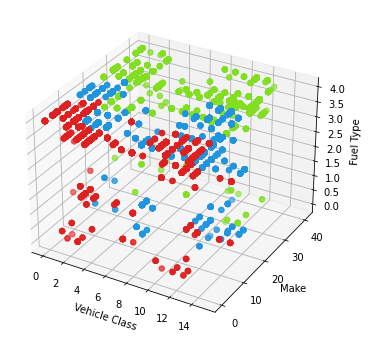

In [59]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
k = 3
kmeans = KMeans(n_clusters=k)
df_cluster = df_car_.copy()
df_cluster['cluster'] = kmeans.fit_predict(df_cluster[['Vehicle Class', 'Make', 'Fuel Type']])
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df_cluster['cen_x'] = df_cluster.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df_cluster['cen_y'] = df_cluster.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
colors = ['#DF2020', '#81DF20', '#2095DF']
df_cluster['c'] = df_cluster.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

df_cluster

fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df_cluster['Vehicle Class'], df_cluster['Make'], df_cluster['Fuel Type'], c=df_cluster.c, s=30)
ax.set_xlabel('Vehicle Class')
ax.set_ylabel('Make')
ax.set_zlabel('Fuel Type')
plt.show()